# Project 3: Drone Delivery

### APMA 3100 Probability

#### Authors: Sonya  Yeprem, Joshua Tapp


## Model Analysis


## Graphs
## $f_{X} (x)$

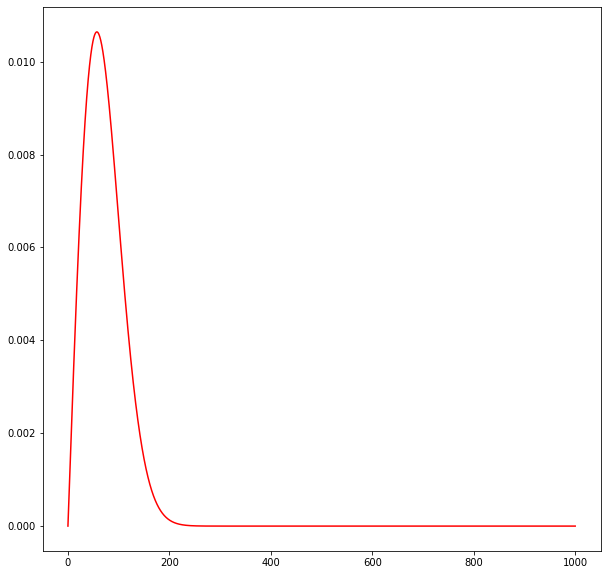

In [168]:
plotpdf(57)

## $F_{X} (x)$

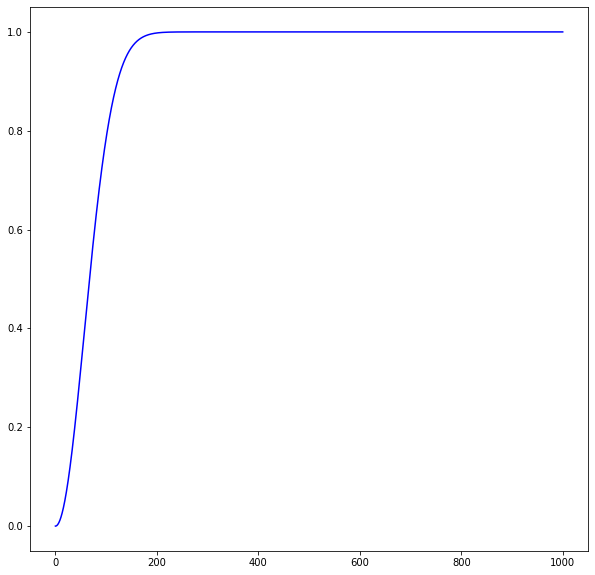

In [169]:
plotcdf(57)

### Area of Distribution W.R.T:  $F_{X}(x) = 0.5$, $F_{X}(x) = 0.7$, $F_{X}(x) = 0.9$ 

The CDF Model of $X$ was used to calculate the three $F_{X}(x)$ values for three different probability levels that were given to us to investigate the distribution and accuracy of drone delivery. Since:
$ F_{X}(x) = 1 − e^{ \frac{-1}{2}a^2x^2},  a = \frac{1}{57}$
We calculate the value of $x$ by solving for $x$: 
$$x=\sqrt{\frac{− 2(ln(1 − p))}{a^2}}$$

We implemented this in the following code:

```{python3}
def inverseCDF(t, p): 
    a = 1/t
    return np.sqrt( ( ( np.log( pow( ( (p - 1) * -1 ), -1) ) )  / ( pow( a, 2 ) / 2 ) ) )
```

Once we plug in the values of p, we will get the results as in the table below:

|   P   | $$x=\sqrt{\frac{− 2(ln(1 − p))}{a^2}}$$ |
| :-----: | :-----: |
|  0.5  |  67.1124  |
|  0.7  |  88.4501  |
|  0.9  |  122.3201 |





The results were graphically represented as circles, centered at the origin and having radius $x$, such that $𝑃[𝑋\le 𝑥] = 𝑝$ where $𝑝 = 0.5, 0.7, 0.9$. The circles represent the radius of actual delivery with respect to the house (at origin) with respective probabilities. So there is a 50% probability that the drone will drop the delivery within 67 inches or 5 feet of the house, 70% probability that delivery will land within 88 inch, and about 7.5 feet from the house and less than 10% possibility that it will land outside of a 10 feet radius.



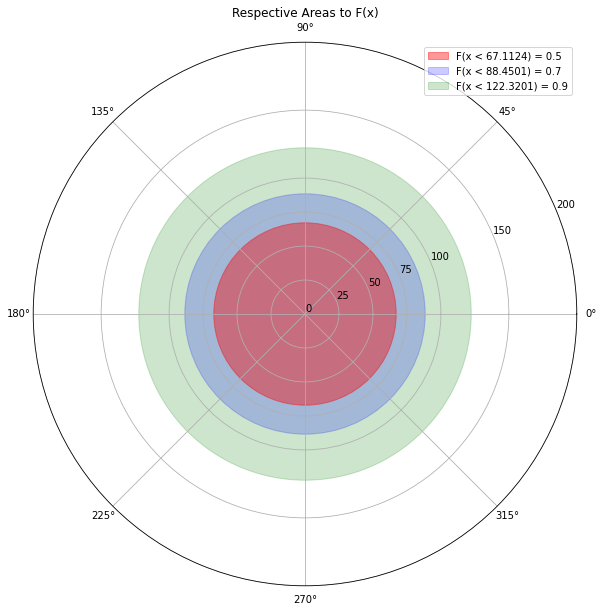

In [170]:
graphCircles()

## Law of Large Numbers

### a. Simulate X
#### i.   Random Number Generator

In [171]:
rand = randomGen()
for x in range(53):
    r = next(rand)
    if(x > 49):
        print(format('%i: %3.4f' %(x+1, r)))
# Generate the 51, 52, 53 random number from our given parameters

51: 0.1995
52: 0.2001
53: 0.0469


#### ii. Simulate Random Variable X

In [172]:
rd = randomGen() # restart our generator
def simulateX():
    p = next(rd)
    return inverseCDF(57, p)

def NsimulateX(n):
    total = 0
    for i in range(n):
        total+= simulateX()
    return total/n    

### b. Generate 110 independent values for $M_n$ for sample sizes $=[10, 30, 50, 100, 250, 500, 1000]$

In [173]:
def Mn110(n):
    values = []
    for i in range(110):
        values.append(NsimulateX(n))
    return values

# arrays to store n values and sample means
ns = np.empty(770) # n values
ms = np.empty(770) # Mn values

ns[0:110] = 10
ns[110:220] = 30
ns[220:330] = 50
ns[330:440] = 100
ns[440:550] = 250
ns[550:660] = 500
ns[660:770] = 1000

for j in range(770):

    ms[j] = NsimulateX(int(ns[j]))




### c. Scatterplot of data from part b

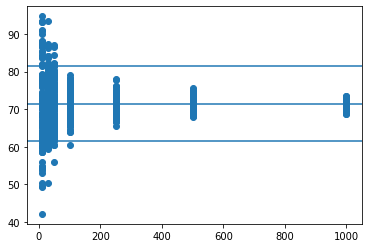

In [174]:
mean = np.sqrt(np.pi / (2*pow(1/57, 2)))
plt.scatter(ns, ms)
plt.axhline(mean)
plt.axhline(mean+10)
plt.axhline(mean-10)
plt.show()

Here we calculate the value of $\mu_{M_n}$ for sample size $n=250$

In [175]:
average = 0
for x in ms[440:550]:
    average+=x
average/= 110
print(average)

71.28335645660464


### d. Scatterplot Analysis

According to our scatterplot, it demonstrates the law of large numbers for the 110 number of independent trials. As our sample size n increases, the tail values decrease and
stabilize around the mean. (thats why for sample space 500 and 1000 its less scattered and closer to mean)
Overall, the experiment of drop error supports the Law of Large Numbers in that as $n$ increases, the sample mean, $M_n(X)$ , approaches the overall mean or the expected value $\mu_X = E[X]$.

### e. What value of $n$ should be used?

For the sample size 𝑛∗ to be used in a real-life experiment which the drone will drop the morning newspaper $𝑛*$ times, the 250 runs in our scatterplot would be the best, which is approximately  71.28335645660464 inches. According to the question, since the requirements are that $n*$ should be as small as possible to minimize the cost of the experiment, but at the same time, $n*$ should be large enough that it is essentially a proxy for $\infty$ in the Law of Large Numbers with $c = 10$ inches, the n*=250 would be a great choice since all values are within 10 of the mean. For n=100, we have one point outside the lines so that is why we chose 250.

### f. Estimating 
With the supplies $c$ value of $10$ inches, we know we are estimating the tails of the distribution. We can use both Gaussian and Chebyshev's inequality to calculate the tails of the distribution when $n=250$. Doing so, gives us the follow:

Gaussian:

$$a=\frac{1}{57}, \ \  n*=250$$

$$ \mu_X = \frac{1}{57}^{-1} * \sqrt{\frac{\pi}{2}} = 71.438 $$

$$Var[X]= \frac{(4-\pi)}{(2a^2)}=1394.48$$
        
        
$$Var[M_{n*}(x)]=\frac{Var[x]}{n*} = 5.57792$$

$$\sigma_{M_{n*}} = \sqrt{5.57792} = 2.3618$$

By the Central Limit Theorem:
$$P[|M_{n*} - \mu_X| < 10] = \phi(\frac{\mu_{M_{n*}} +10 - \mu_{X}}{\sigma_{M_{n*}}}) - \phi(\frac{\mu_{M_{n*}} -10 - \mu_{X}}{\sigma_{M_{n*}}})  $$

$$= \phi(4.16) - \phi(-4.30) = (1 - 1.59^{-5}) - (1 - (1 - 8.54 * 10^{-6}) = 0.99997556$$ 


Chebyshev: $$a=\frac{1}{57}, \ \  n*=250$$


$$Var[X]= \frac{(4-\pi)}{(2a^2)}=1394.48$$
        
        
$$Var[M_{n*}(x)]=\frac{Var[x]}{n*} = 5.57792$$
        
        
According to chebyshev’s inequality:

$$P[|M_{n*} - \mu_X| \ge 10] = \frac{Var[M_{n*}(x)]}{100} = 0.0557792$$

$$P[|M_{n*} - \mu_X| < 10] = 1 - P[|M_{n*} - \mu_X| \ge 10] = 1 - 0.0557792 = 0.9442208$$

Since Gaussian is more accurate, the estimation will be 0.99997556.





## Central Limit Theorem

### c. Calculations and Graphs


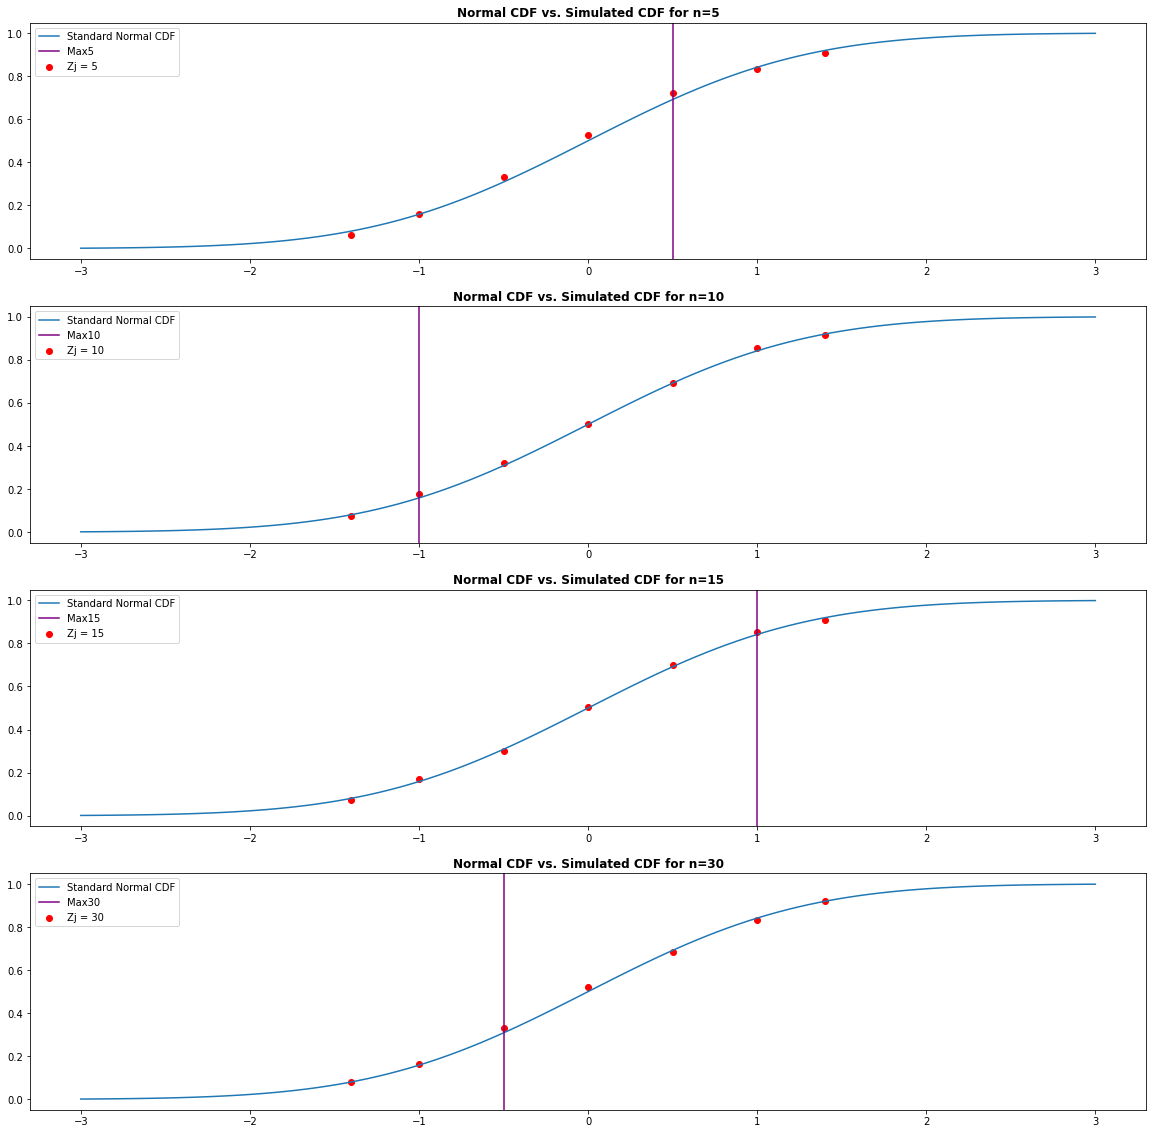

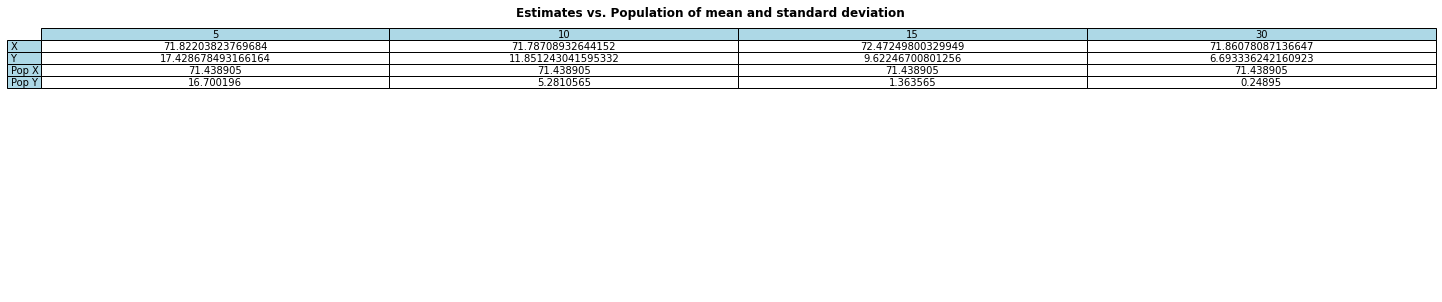

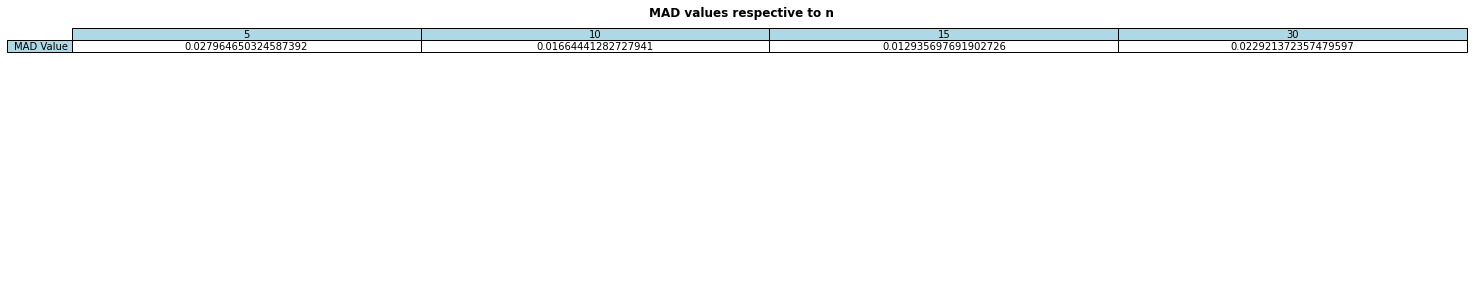

In [176]:
graphCDFcomp()
table1()
table2()

### d. Analysis on the behavior of the CDFs

When the data is of the empirically found CDF is plotted against the actual CDF, it is apparent that the empirical data does not match up perfectly with the ideal. This is to be expected as the simulation is to mimic real data collection as close as possible. The independent variable in this analysis is the number of trials, n . This change can be seen in the graphs as n increases, the dots, the empirical data, changes as well. As n increases, the empirical CDF becomes closer and closer to a gaussian or normal distribution. This data is in support of the Central Limit theorem which states that as n → ∞ the distribution of the sample mean approaches a gaussian or normal distribution.. The first few n increments though show little change, this is due to the change in magnitude of n is not much, and the randomness of the data still has a large effect, but when the magnitude of n is nearing very large, the distribution of the raw data mimics a normal distribution much better than when n is smaller. One point of contention with the data is that the maximum absolute difference, MADn , for n = 500 was less than the MADn for when n = 1000.According to the Central Limit Theorem, the difference should be less when n is larger. 
Overall though, the maximum absolute difference as n → ∞ = 0 , which is in support of
the Central Limit Theorem.


### Code
_see for 3b_

In [177]:
# Code for simulating Events for part 2/3
# Written by Joshua Tapp (jct7bm) 04.29.2021

def randomGen():
    seed = 1000
    a = 24693
    c = 3967
    K = 262144 #2^18
    while True:
        seed = (((a * seed) + c) % K) # update seed
        output = seed / K             # return the random number
        yield output

In [178]:
# General Functions and Code for Graphing Model Analysis
# Written by Joshua Tapp (jct7bm) 04.29.2021

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def pdf(t, x):       #pdf of Rayleigh distribution
    a = 1/t
    if(x > 0):
        return ( pow(a, 2) * x * np.exp( -.5*pow(a, 2)* pow(x, 2) ) )
    
    else:
        return 0    # error x <= 0 
    
def cdf(t, x):       #cdf of Rayleigh distribution
    a = 1/t
    if(x > 0):
        return ( 1 - np.exp( -0.5 * pow( a, 2 ) * pow( x, 2 ) ) ) 
    
    else:
        return 0    # error x <= 0

def inversePDF(t, p):
    a = 1/t
    return np.sqrt( ( ( np.log( pow( ( (p - 1) * -1 ), -1) ) )  / ( pow( a, 2 ) / 2 ) ) )

def inverseCDF(t, p):
    a = 1/t
    return np.sqrt( ( ( np.log( pow( ( (p - 1) * -1 ), -1) ) )  / ( pow( a, 2 ) / 2 ) ) )


def meanRayleigh(t):
    return ( ( t ) * np.sqrt( math.pi / 2 ) )

def varRayleigh(t):
    a = 1/t
    return ( ( 4 - np.pi ) / ( 2 * pow( a, 2 ) ) )

def plotpdf(t):
    a = 1/t
    x = np.linspace(0,1000, 100000)
    y = ( pow(a, 2) * x * np.exp( -.5*pow(a, 2)* pow(x, 2) ) )
    plt.figure(figsize=(10,10))
    plt.plot(x,y, 'r')
    
def plotcdf(t):
    a = 1/t
    x = np.linspace(0,1000, 100000)
    y = ( 1 - np.exp( -0.5 * pow( a, 2 ) * pow( x, 2 ) ) ) 
    plt.figure(figsize=(10,10))
    plt.plot(x,y, 'b')

def graphCircles():
    plt.figure(figsize=(10,10))
    ax = plt.subplot(1, 1, 1, polar=True, aspect='auto')

    plt.title("Respective Areas to F(x)")
    lines, labels = plt.rgrids( (0, 25, 50, 75, 100, 150, 200))
    r1 = inverseCDF(57, .5)
    r2 = inverseCDF(57, .7)
    r3 = inverseCDF(57, .9)
    circle1 = plt.Circle( (0, 0), r1, transform=ax.transData._b, color="red", alpha=0.4)
    circle2 = plt.Circle( (0, 0), r2, transform=ax.transData._b, color="blue", alpha=0.2)
    circle3 = plt.Circle( (0, 0), r3, transform=ax.transData._b, color="green", alpha=0.2)
    circles = [circle1, circle2, circle3]
    ax.legend(circles, [ format('F(x < %3.4f) = 0.5' % r1), format('F(x < %3.4f) = 0.7' % r2), format('F(x < %3.4f) = 0.9' % r3) ])
    ax.add_artist(circle3)
    ax.add_artist(circle2)
    ax.add_artist(circle1)
   
# =)


In [179]:
def Mn550(n):
    values = []
    for i in range(550):
        values.append(NsimulateX(n))
    return values

# arrays to store n values and sample means
ns = np.empty(2200) # n values
ms = np.empty(2200) # Mn values

ns[0:550]     = 5
ns[550:1100]  = 10
ns[1100:1650] = 15
ns[1650:2200] = 30

for j in range(2200):
    ms[j] = NsimulateX(int(ns[j]))

means = np.empty(4)
variances = np.empty(4)
index = 0
meanSum = 0
varSum = 0
for x in range(4):
    for y in range(550):
        meanSum += ms[index]
        index += 1
        
    means[x] = meanSum / 550
    meanSum = 0
    
index = 0
for x in range(4):
    for z in range(550):
        varSum += (pow( ms[index], 2) - pow(means[x],2))
        index += 1
    variances[x] = varSum / 550
    varSum = 0
    
print(means)
print(variances)
stdDevs = np.sqrt(variances)


[71.82203824 71.78708933 72.472498   71.86078087]
[303.75883402 140.45196163  92.59187132  44.80075005]


In [180]:
index = 0
stdMn = np.empty(2200)
for x in range(4):
    for y in range(550):
        stdMn[index] = (ms[index] - means[x]) / stdDevs[x]
        index+=1


from statistics import NormalDist

Zj = [-1.4, -1.0, -0.5, 0, 0.5, 1.0, 1.4]


def ZnEstimate(Zn, Zj):
    countZ = np.empty(7)
    for x in Zn: #Zn values
        for index, value in enumerate(Zj):
            if(x < value):
                countZ[index] += 1
    countZ/=len(Zn)
    return countZ

def MAD(Z, Zj):
    maxValue = 0
    for x in range(len(Z)):
        temp = np.abs( Z[x] -  NormalDist().cdf(Zj[x]))
        if temp > maxValue:
            maxValue = temp
    return maxValue

Z5 = ZnEstimate(stdMn[0:550], Zj)
Z10 = ZnEstimate(stdMn[550:1100], Zj)
Z15 = ZnEstimate(stdMn[1100:1650], Zj)
Z30 = ZnEstimate(stdMn[1650:2200], Zj)

Max5 = MAD(Z5, Zj)
Max10 = MAD(Z10, Zj)
Max15 = MAD(Z15, Zj)
Max30 = MAD(Z30, Zj)
madMax = [Max5, Max10, Max15, Max30]
print(madMax)


[0.026719356907805136, 0.4733744713628548, 0.015302113779225607, 0.022371552183103993]


In [181]:
import scipy.stats
def graphCDFcomp():
    maxYVal = [0.5, -1.0, 1, -.5]
    nValues = [5, 10, 15, 30]
    maxLabels = ["Max5", "Max10", "Max15", "Max30"]
    ZN = [Z5, Z10, Z15, Z30]
    # x and y values for CDF of normal distribution 
    x = np.linspace(-3, 3, 100) # x axis
    y = []
    fig, axes= plt.subplots(nrows=4, ncols=1,figsize=(20,20))

    for a in x:
        y.append(NormalDist().cdf(a))
    

    for index in range(4):
        axes[index].plot(x,y, label = "Standard Normal CDF")
        axes[index].scatter(Zj, ZN[index], color='red', label="Zj = %i" %nValues[index] )
        axes[index].axvline(maxYVal[index], color='purple', label="%s" % maxLabels[index])
        axes[index].legend()
        axes[index].set_title("Normal CDF vs. Simulated CDF for n=%s" %nValues[index], fontweight="bold")
        
    plt.show()

In [182]:
def table1():
    mu = [71.438905, 71.438905, 71.438905, 71.438905]
    stdev = [16.700196, 5.2810565, 1.363565, 0.24895]

    val2 = ["X", "Y", "Pop X", "Pop Y"]
    val1 = [5, 10, 15, 30]
    val3 = [means, stdDevs, mu, stdev]

    fig, ax = plt.subplots(figsize=(25,5)) 
    ax.set_axis_off() 
    table = ax.table( 
        cellText = val3,  
        rowLabels = val2,  
        colLabels = val1, 
        rowColours =["lightblue"] * 10,  
        colColours =["lightblue"] * 10, 
        cellLoc ='center',  
        loc ='upper left')         

    ax.set_title('Estimates vs. Population of mean and standard deviation', 
                 fontweight ="bold") 

    plt.show() 


In [183]:
def table2():
    val1 = [5, 10, 15, 30]
    val2 = ["MAD Value"]
    val3 = [madMax]
    fig, ax = plt.subplots(figsize=(25,5)) 
    ax.set_axis_off()
    table = ax.table( 
        cellText = val3,  
        rowLabels = val2,  
        colLabels = val1, 
        rowColours =["lightblue"] * 10,  
        colColours =["lightblue"] * 10, 
        cellLoc ='center',  
        loc ='upper left') 
    ax.set_title('MAD values respective to n', 
                 fontweight ="bold") 

    plt.show() 